In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [199]:
dataset1 = pd.read_csv("BostonHousing.csv")

In [200]:
dataset1.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [201]:
dataset1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [202]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [203]:
dataset1.shape

(506, 14)

In [204]:
dataset1.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [205]:
dataset1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Preprocessing: Normalize numerical features 


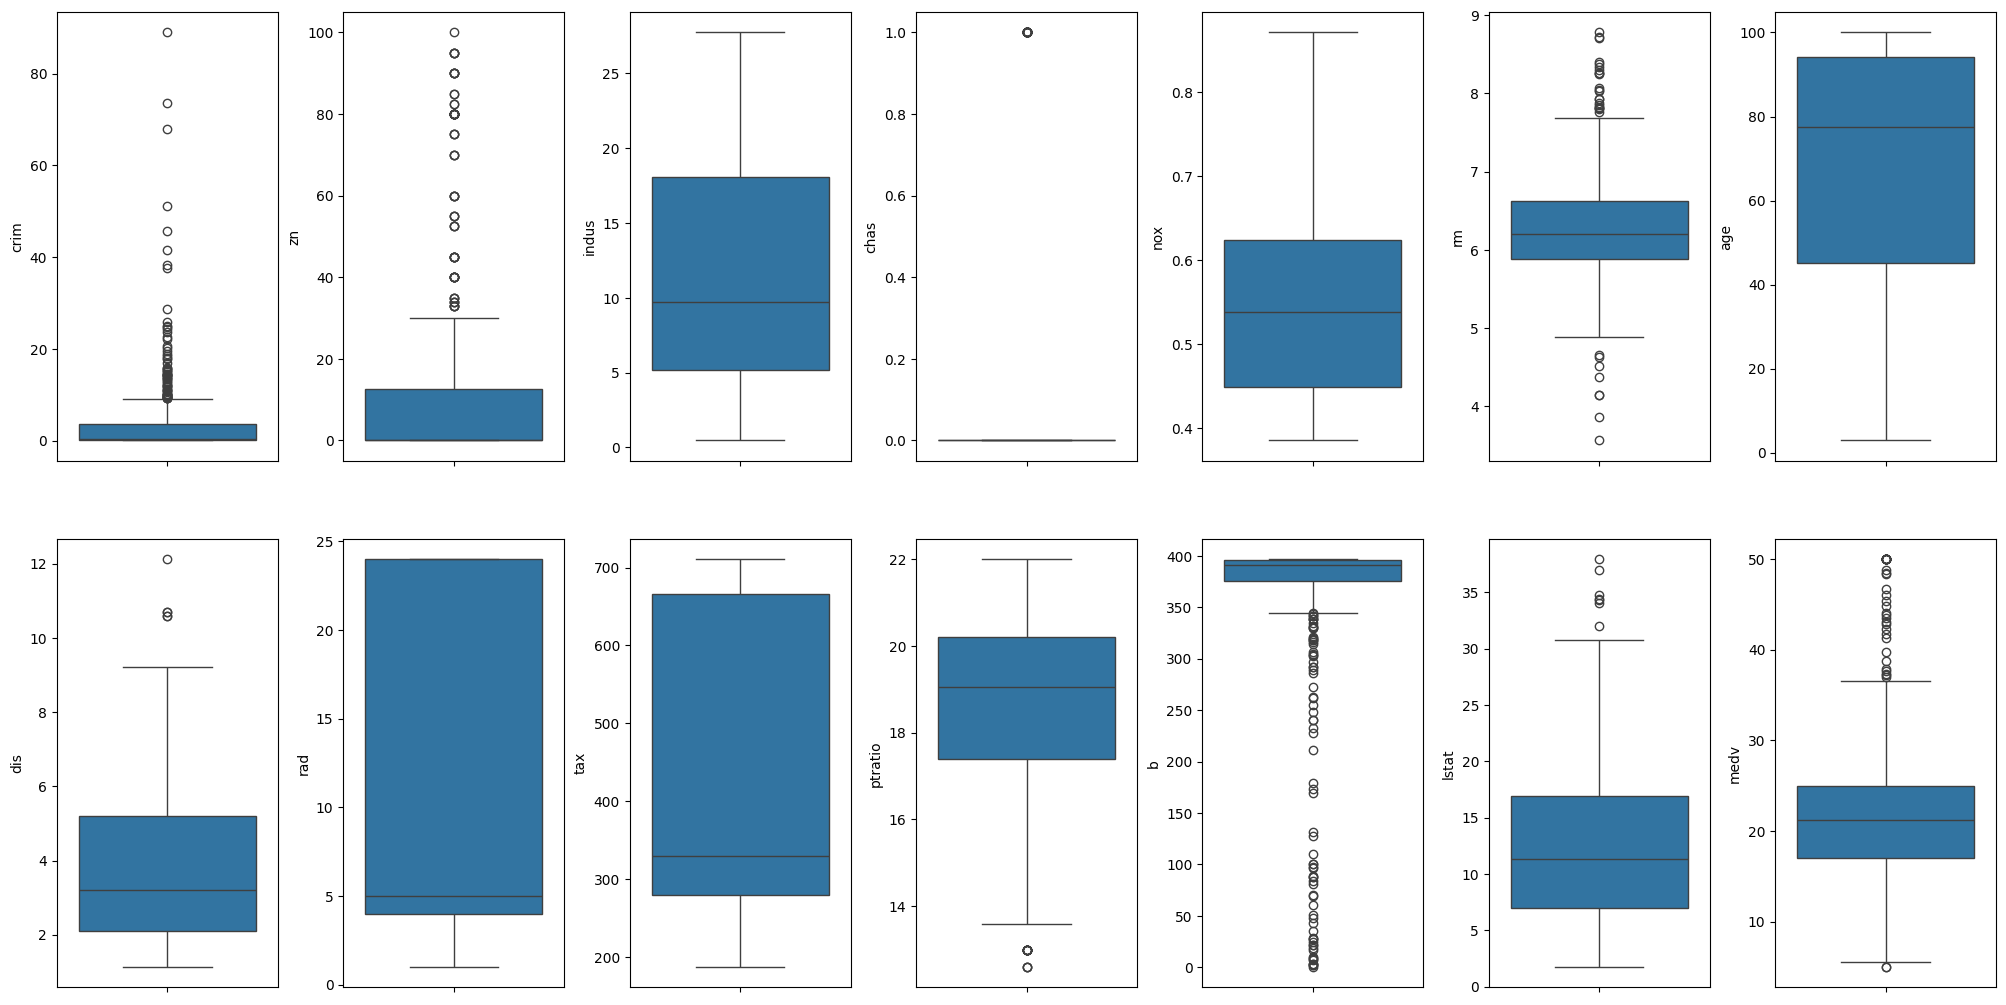

In [206]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in dataset1.items():
    sns.boxplot(y=col, data=dataset1, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [207]:
# Normalize the several columns that consist outliers
cols = ['crim', 'zn','rm', 'tax', 'b','medv']
# Loop through each column and apply min-max scaling
for col in cols:
    minimum = min(dataset1[col])
    maximum = max(dataset1[col])
    # Check if maximum equals minimum (zero range)
    if maximum != minimum:
        # Apply the min-max scaling formula
        dataset1[col] = (dataset1[col] - minimum) / (maximum - minimum)
    else:
        # Handle the case where there's no variation in the column
        dataset1[col] = 0  
print(dataset1.head())

       crim    zn  indus  chas    nox        rm   age     dis  rad       tax  \
0  0.000000  0.18   2.31     0  0.538  0.577505  65.2  4.0900    1  0.208015   
1  0.000236  0.00   7.07     0  0.469  0.547998  78.9  4.9671    2  0.104962   
2  0.000236  0.00   7.07     0  0.469  0.694386  61.1  4.9671    2  0.104962   
3  0.000293  0.00   2.18     0  0.458  0.658555  45.8  6.0622    3  0.066794   
4  0.000705  0.00   2.18     0  0.458  0.687105  54.2  6.0622    3  0.066794   

   ptratio         b  lstat      medv  
0     15.3  1.000000   4.98  0.422222  
1     17.8  1.000000   9.14  0.368889  
2     17.8  0.989737   4.03  0.660000  
3     18.7  0.994276   2.94  0.631111  
4     18.7  1.000000   5.33  0.693333  


In [208]:
dataset1.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
284,0.000031,0.90,2.97,0,0.400,0.675800,20.8,7.3073,1,0.187023,15.3,0.994503,7.85,0.604444
182,0.000952,0.00,2.46,0,0.488,0.688638,92.2,2.7006,3,0.011450,17.8,0.992990,4.82,0.731111
248,0.001777,0.22,5.86,0,0.431,0.550297,49.1,7.8265,7,0.272901,19.1,0.944047,9.52,0.433333
32,0.015530,0.00,8.14,0,0.538,0.457751,82.0,3.9900,4,0.229008,21.0,0.585708,27.71,0.182222
440,0.247778,0.00,18.10,0,0.740,0.432458,92.4,1.8662,24,0.914122,20.2,0.986258,22.11,0.122222


<Axes: >

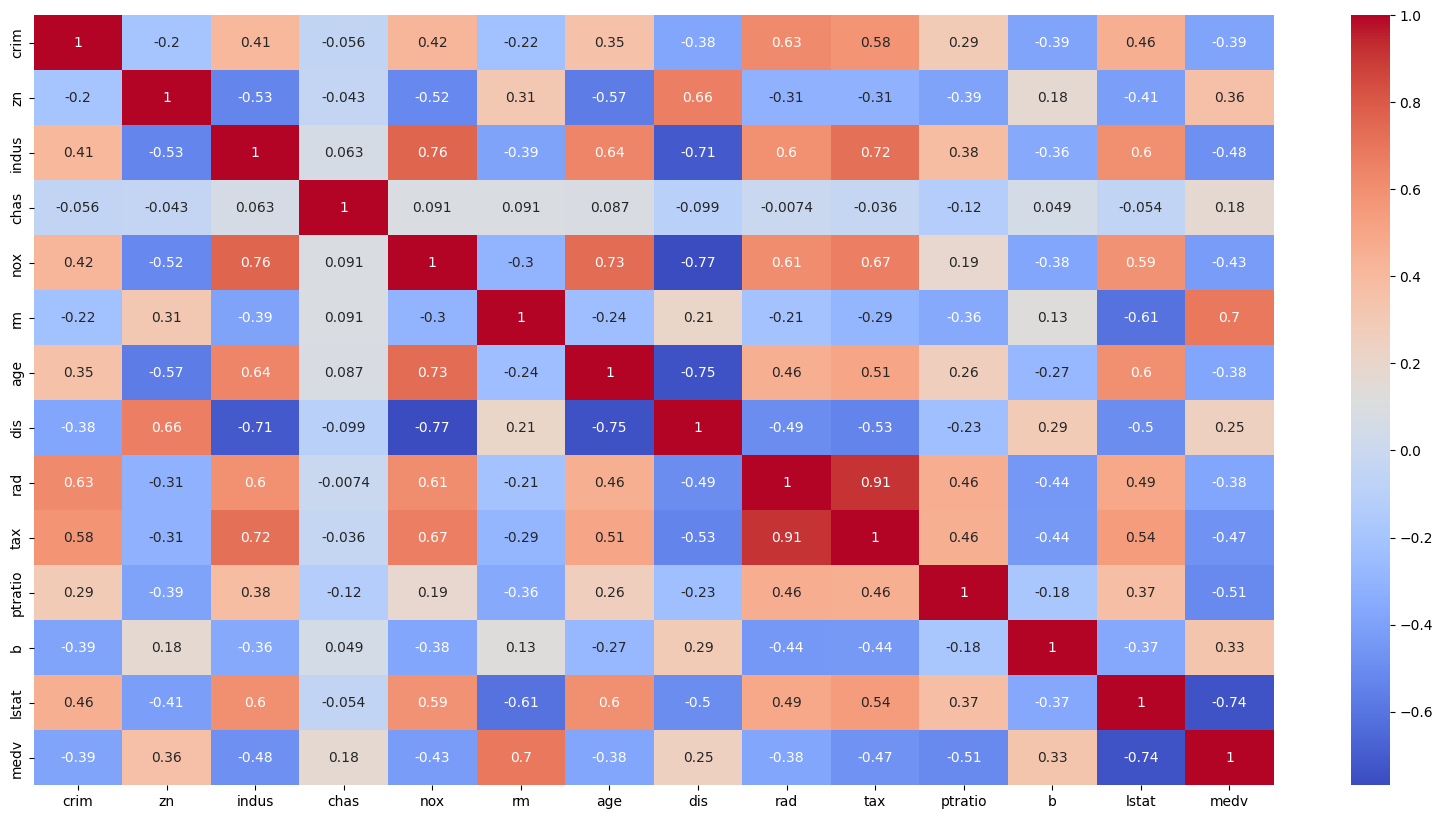

In [209]:
corr = dataset1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='lstat', ylabel='medv'>

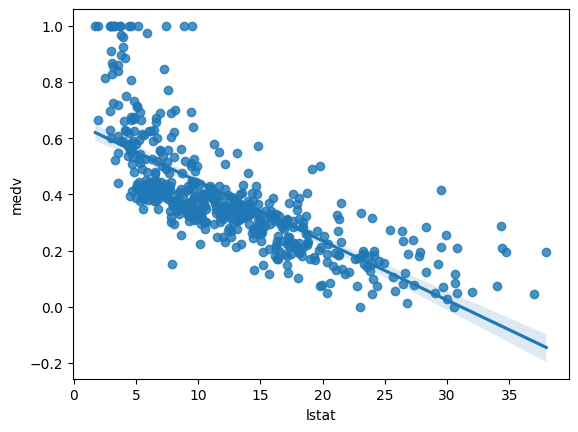

In [210]:
sns.regplot(y=dataset1['medv'], x=dataset1['lstat'])


<Axes: xlabel='rm', ylabel='medv'>

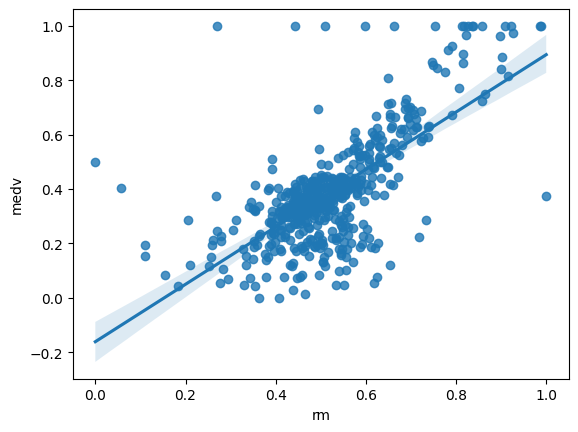

In [211]:
sns.regplot(y=dataset1['medv'], x=dataset1['rm'])


In [212]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset1)
normalized_dataset1 = pd.DataFrame(normalized_data, columns=dataset1.columns)

In [213]:
print("Min-Max Normalized Data:")

normalized_dataset1.head(5)

Min-Max Normalized Data:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


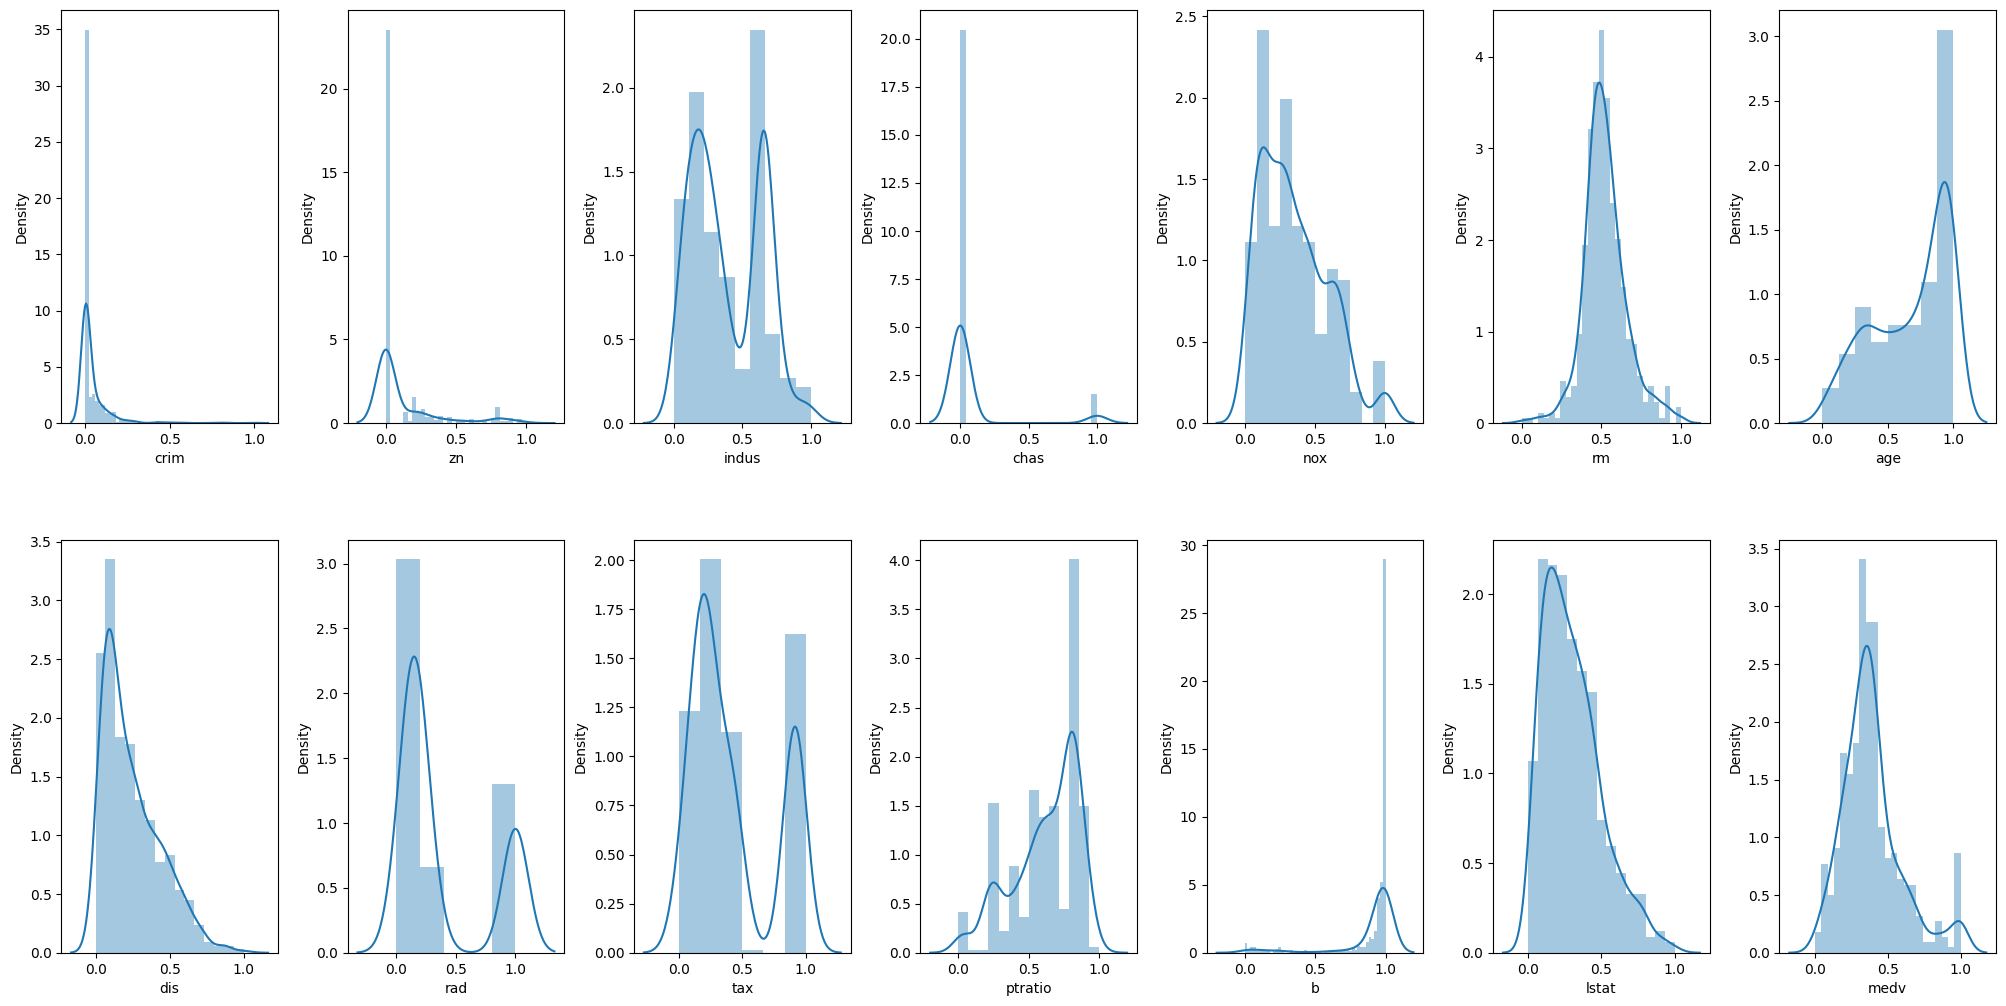

In [214]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in normalized_dataset1.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [215]:
X1 = normalized_dataset1.drop(columns=['medv'], axis=1)
y1 = normalized_dataset1['medv']

In [216]:
X1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


# Model Training by Linear Regression from Scratch

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [218]:
# Normalize the data (Standardization in this case)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
class LinearRegressionScratch:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add a bias term (intercept) to the input features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        # Using Normal Equation to calculate theta
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add the bias term (intercept)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(self.theta)

In [220]:
model_lr = LinearRegressionScratch()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


# Evaluate the model (MSE)


In [221]:
mse_lr = np.mean((y_pred_lr - y_test) ** 2)
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MSE: 0.011995614555542477


# Prediction 

In [222]:
X_test[1]

array([-0.40079621,  1.2294987 , -0.66439105,  3.59597476, -0.93131473,
        0.62394249, -1.27525438,  0.12656515, -0.62435988, -0.90398873,
       -0.32270256,  0.44418004, -1.25709448])

In [224]:
y_pred_lr

array([ 0.53326052,  0.68945701,  0.21815431,  0.44515509,  0.30599733,
        0.40565398,  0.28138974,  0.207582  ,  0.40029349,  0.34738791,
        0.44241122,  0.30308525, -0.24640937,  0.3724077 ,  0.31642724,
        0.47095994,  0.3477274 ,  0.0176606 ,  0.78889644,  0.28028646,
        0.49442433,  0.55702788,  0.14092873,  0.42579503,  0.28579078,
        0.24080217,  0.39514402,  0.21282321,  0.38747246,  0.31547374,
        0.38741855,  0.44932868,  0.46531324,  0.28225832,  0.26153594,
        0.26558342,  0.58296448,  0.33627705,  0.41701756,  0.43627317,
        0.19871221,  0.60568362,  0.83716692,  0.27394334,  0.49502636,
        0.26651355,  0.20155758,  0.46452041,  0.33988577,  0.55451992,
        0.36196893,  0.65210041,  0.24549758,  0.47168054,  0.76754218,
        0.39065571,  0.30767364,  0.61611815,  0.44594008,  0.17525088,
        0.3929382 ,  0.56628617,  0.58947262,  0.24225525,  0.33824329,
        0.26024218,  0.34497442,  0.46585695,  0.56924622,  0.14

In [226]:
a =np.array([[-0.40079621,  1.2294987 , -0.66439105,  3.59597476, -0.93131473,
        0.62394249, -1.27525438,  0.12656515, -0.62435988, -0.90398873,
       -0.32270256,  0.44418004, -1.25709448]])
result = model_lr.predict(a)

In [227]:
result

array([0.68945701])

# Feature Importance

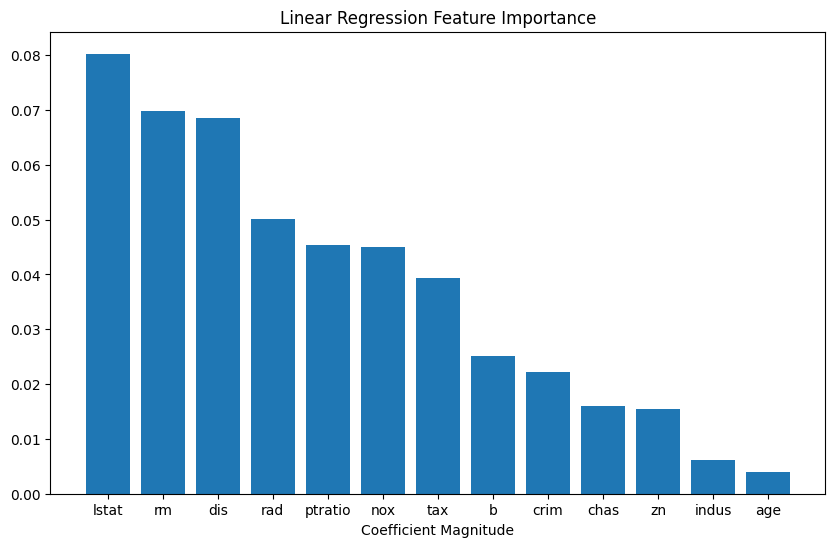

In [230]:
import matplotlib.pyplot as plt
coefficients = model_lr.theta[1:]  

feature_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Sort features by absolute coefficient value
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(np.array(feature_names)[sorted_idx], importance[sorted_idx])
plt.xlabel("Coefficient Magnitude")
plt.title("Linear Regression Feature Importance")
plt.show()


# Model Training by Ramdom Forest Algorithm from Scratch

In [231]:
data = normalized_dataset1.copy()

In [232]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [233]:
X = data.drop(columns=['medv'])  
y = data['medv']  

In [234]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [236]:
import random
class RandomForestScratch:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []
        self.feature_importances_ = None  # To store feature importances across all trees

    def fit(self, X, y):
        self.trees = []
        n_samples = int(self.sample_size * X.shape[0])
        # Initialize the feature importances array to match the number of features in X
        self.feature_importances_ = np.zeros(X.shape[1])
        
        for _ in range(self.n_trees):
            # Bootstrap sampling
            indices = random.choices(range(X.shape[0]), k=n_samples)
            X_sample, y_sample = X[indices, :], y[indices]
            tree, tree_importances = self._build_tree(X_sample, y_sample, depth=0)
            self.trees.append(tree)
            self.feature_importances_ += tree_importances  # Aggregate feature importances from the current tree

        # Normalize feature importances so they sum to 1
        self.feature_importances_ /= np.sum(self.feature_importances_)

    def predict(self, X):
        # Aggregate predictions from all trees (mean of predictions)
        predictions = np.array([self._predict_tree(tree, x) for tree in self.trees for x in X])
        return predictions.reshape(self.n_trees, X.shape[0]).mean(axis=0)

    def _build_tree(self, X, y, depth):
        # Stop splitting if max depth is reached or only one unique label remains
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y), np.zeros(X.shape[1])  # Return the prediction value and feature importances for this node

        # Find the best split
        feat_idx, threshold, left_indices, right_indices, loss_reduction = self._best_split(X, y)
        if feat_idx is None:
            return np.mean(y), np.zeros(X.shape[1])

        # Calculate feature importance for the split
        feature_importances = np.zeros(X.shape[1])
        feature_importances[feat_idx] += loss_reduction  # Add the reduction in MSE for the feature
        
        # Split data
        left_subtree, left_importances = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree, right_importances = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        # Aggregate feature importances
        feature_importances += left_importances + right_importances

        # Return the subtree and the feature importances
        return (feat_idx, threshold, left_subtree, right_subtree), feature_importances

    def _best_split(self, X, y):
        # Find the best feature and threshold to split on
        best_feat, best_thresh = None, None
        best_loss = float('inf')
        best_loss_reduction = 0
        best_left_indices, best_right_indices = None, None
        
        for feat_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feat_idx])
            for threshold in thresholds:
                left_indices = X[:, feat_idx] <= threshold
                right_indices = ~left_indices
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                # Calculate loss (MSE)
                left_loss = self._mse(y[left_indices])
                right_loss = self._mse(y[right_indices])
                loss_reduction = self._mse(y) - (len(left_indices) / len(y)) * left_loss - (len(right_indices) / len(y)) * right_loss

                if loss_reduction > best_loss_reduction:
                    best_loss_reduction = loss_reduction
                    best_feat, best_thresh = feat_idx, threshold
                    best_left_indices, best_right_indices = left_indices, right_indices

        return best_feat, best_thresh, best_left_indices, best_right_indices, best_loss_reduction

    def _mse(self, y):
        return np.mean((y - np.mean(y)) ** 2) if len(y) > 0 else 0

    def _predict_tree(self, tree, x):
        if not isinstance(tree, tuple):
            return tree
        feat_idx, threshold, left_subtree, right_subtree = tree
        if x[feat_idx] <= threshold:
            return self._predict_tree(left_subtree, x)
        else:
            return self._predict_tree(right_subtree, x)


# Convert to NumPy array
X_train_np = X_train.values  
y_train_np = y_train.values  
X_test_np = X_test.values
y_test_np = y_test.values

 


In [237]:
# Train Random Forest model
rf_model = RandomForestScratch(n_trees=10, max_depth=5, sample_size=0.8)
rf_model.fit(X_train_np, y_train_np)

In [238]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_np)

In [239]:
a = np.array([[0.000293	,0.00,0.063050	,0.0	,0.150206	,0.658555	,0.441813	,0.448545	,0.086957	,0.066794	,0.648936	,0.994276	,0.033389]])
res = rf_model.predict(a)
res

array([0.4634802])

In [240]:
# Evaluate the model using MSE and R²
mse = np.mean((y_test - y_pred_rf) ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred_rf) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.023439480426795476
R-squared (R²): 0.35275468114753394


# Feature Importance:

Feature Importances: [0.11744254 0.00515773 0.07819666 0.02590623 0.01262214 0.16895344
 0.01873992 0.21830152 0.         0.01433215 0.00352657 0.03487099
 0.30195013]


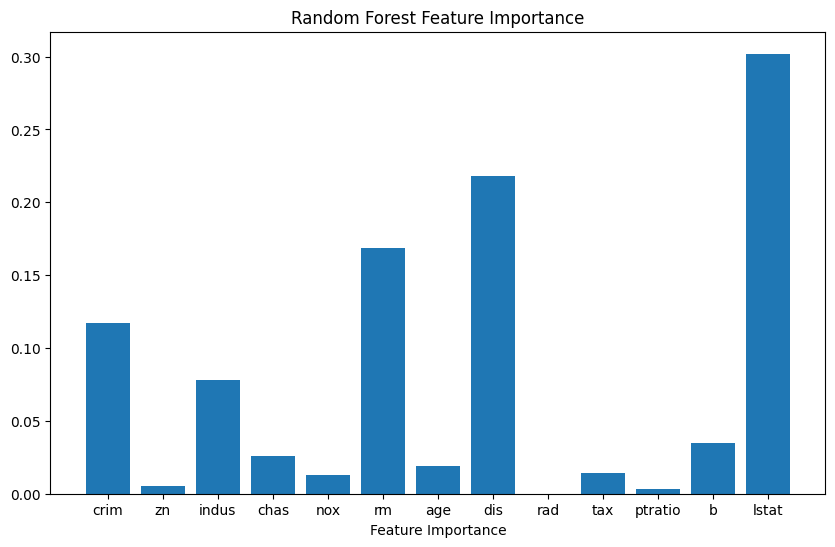

In [241]:
import matplotlib.pyplot as plt

print("Feature Importances:", rf_model.feature_importances_)

# Visualize feature importances
feature_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
plt.figure(figsize=(10, 6))
plt.bar(feature_names, rf_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


# Model Training by  XGBoost  from Scratch


In [243]:
dataXG = normalized_dataset1.copy()

In [245]:
dataXG.sample(7)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
118,0.001397,0.00,0.350073,0.0,0.333333,0.442805,0.722966,0.122571,0.217391,0.467557,0.553191,0.853069,0.376380,0.342222
252,0.000853,0.22,0.197947,0.0,0.094650,0.650699,0.040165,0.707208,0.260870,0.272901,0.691489,0.972742,0.049669,0.546667
73,0.002125,0.00,0.379399,0.0,0.057613,0.514275,0.033986,0.378079,0.130435,0.225191,0.702128,0.950250,0.160320,0.408889
218,0.001173,0.00,0.492302,1.0,0.339506,0.457942,0.936148,0.160018,0.173913,0.169847,0.404255,1.000000,0.446744,0.366667
66,0.000421,0.80,0.106672,0.0,0.026749,0.426518,0.290422,0.498495,0.130435,0.286260,0.372340,1.000000,0.234823,0.320000
481,0.064088,0.00,0.646628,0.0,0.302469,0.611037,0.741504,0.200247,1.000000,0.914122,0.808511,0.990342,0.165839,0.415556
112,0.001315,0.00,0.350073,0.0,0.333333,0.450661,0.926880,0.111286,0.217391,0.467557,0.553191,0.995083,0.399558,0.306667


In [246]:
X = dataXG.drop(columns=['medv'], axis=1)
y = dataXG['medv']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [248]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_values = len(np.unique(y))

        # Stopping condition
        if unique_values == 1 or depth == self.max_depth:
            return np.mean(y)

        best_split = self._best_split(X, y)
        left_X, left_y, right_X, right_y = self._split(X, y, best_split)

        left_tree = self._build_tree(left_X, left_y, depth + 1)
        right_tree = self._build_tree(right_X, right_y, depth + 1)

        return {
            'split': best_split,  # [feature_index, threshold]
            'left': left_tree,
            'right': right_tree
        }

    def _best_split(self, X, y):
        best_split = None
        best_score = float('inf')
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            values = np.unique(X[:, feature_index])
            for value in values:
                left_mask = X[:, feature_index] <= value
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                score = self._mse(left_y, right_y)

                if score < best_score:
                    best_score = score
                    best_split = (feature_index, value)

        return best_split

    def _split(self, X, y, split):
        feature_index, value = split
        left_mask = X[:, feature_index] <= value
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def _mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y)) ** 2)
        right_mse = np.mean((right_y - np.mean(right_y)) ** 2)
        return len(left_y) * left_mse + len(right_y) * right_mse

    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        # Check if tree is a leaf node (float/int)
        if isinstance(tree, (int, float)):
            return tree

        feature_index, threshold = tree['split']
        if x[feature_index] <= threshold:
            return self._predict_single(x, tree['left'])
        else:
            return self._predict_single(x, tree['right'])


In [249]:
class XGBoostScratch:
    def __init__(self, n_estimators=50, max_depth=3, learning_rate=0.1, lambda_reg=1.0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.trees = []
        self.alphas = []  # The weights or contributions of each tree in the final model

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize with the mean value
        self.init_pred = np.mean(y)
        y_pred = np.full(y.shape, self.init_pred)
        
        for _ in range(self.n_estimators):
            # Compute residuals (targets - current prediction)
            residuals = y - y_pred

            # Train a new tree on the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            
            # Predict the residuals using the trained tree
            tree_pred = tree.predict(X)
            
            # Compute the optimal alpha (shrinkage) using the sum of squared residuals
            alpha = np.dot(residuals, tree_pred) / np.sum(tree_pred ** 2 + self.lambda_reg)
            self.alphas.append(alpha)
            
            # Update the overall prediction
            y_pred += self.learning_rate * alpha * tree_pred
            self.trees.append(tree)

    def predict(self, X):
        # Start with the initial prediction (mean value)
        y_pred = np.full(X.shape[0], self.init_pred)
        
        for tree, alpha in zip(self.trees, self.alphas):
            # Get the tree predictions for all samples
            tree_pred = tree.predict(X)
            
            # Add the prediction contribution from each tree
            y_pred += self.learning_rate * alpha * tree_pred
        
        return y_pred
    



In [251]:
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test


In [252]:
# Now, train the XGBoost model
model_xgb = XGBoostScratch(n_estimators=50, max_depth=3, learning_rate=0.1, lambda_reg=1.0)
model_xgb.fit(X_train, y_train)

In [253]:
# Now make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

In [254]:
a = np.array([[0.000293	,0.00,0.063050	,0.0	,0.150206	,0.658555	,0.441813	,0.448545	,0.086957	,0.066794	,0.648936	,0.994276	,0.033389]])
res = model_xgb.predict(a)
res

array([0.42637107])

In [255]:
# Calculate Mean Squared Error (MSE)
mse_xgb = np.mean((y_pred_xgb - y_test) ** 2)
# Print the final MSE
print(f"XGBoost MSE: {mse_xgb}") 

XGBoost MSE: 0.029477691696026757


# Performance Comparison:
# Compare the models using RMSE and R² metrics.


In [256]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R² for each model
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lin_reg = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Linear Regression - RMSE: {rmse_lin_reg}, R²: {r2_lin_reg}")
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")
print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}")


Linear Regression - RMSE: 0.10952449294811858, R²: 0.668759493535632
Random Forest - RMSE: 0.15309957683414893, R²: 0.35275468114753394
XGBoost - RMSE: 0.17169068610739127, R²: 0.18601873363120647
